In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Data set/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [3]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [6]:
df.shape

(400, 5)

In [7]:
#Droping not import columns in dataset
df.drop("User ID",axis=1,inplace=True)

In [8]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [9]:
#convert the categorical value into numarical value using get_dummies
#Here get_dummies droup_first attribute used to delet the converted column
df=pd.get_dummies(df,drop_first=True)
df

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,1,1
397,50,20000,1,0
398,36,33000,0,1


In [10]:
# #Separating x and y 
# x=df[["Age","EstimatedSalary","Gender_Male"]].values
# y=df["Purchased"].values
# # # we can also use loc method for selecting required column
x=df.loc[:,["Age","EstimatedSalary","Gender_Male"]].values
y=df.loc[:,["Purchased"]].values

In [11]:
x

array([[   19, 19000,     1],
       [   35, 20000,     1],
       [   26, 43000,     0],
       ...,
       [   50, 20000,     0],
       [   36, 33000,     1],
       [   49, 36000,     0]], dtype=int64)

In [12]:
y

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [13]:
# Feature Scaling
# Whenever we are dealing with KNN algorithm, we should do the feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(x)
X

array([[-1.78179743, -1.49004624,  1.02020406],
       [-0.25358736, -1.46068138,  1.02020406],
       [-1.11320552, -0.78528968, -0.98019606],
       ...,
       [ 1.17910958, -1.46068138, -0.98019606],
       [-0.15807423, -1.07893824,  1.02020406],
       [ 1.08359645, -0.99084367, -0.98019606]])

In [14]:
print("actual_shape_of_x =",X.shape)

actual_shape_of_x = (400, 3)


In [15]:
print("actual_shape_of_y =",y.shape)

actual_shape_of_y = (400, 1)


In [16]:
#model was expecting a 1d array as input thats why we reshape it
Y=y.reshape(-1)
Y.shape

(400,)

In [17]:
#After feature scaling we split the data in training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state = 0, test_size = 0.25)

In [18]:
x_train.shape

(300, 3)

In [19]:
y_train.shape

(300,)

In [20]:
x_test.shape

(100, 3)

In [21]:
y_test.shape

(100,)

In [22]:
#selecting the packages for KNN classifier and metric for checking accuracy and confusion metrix
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [23]:
#Selecting k values for the KNN model Note: k value must be a odd number
Accuracy_list=[]
Error_list=[]
for k in range(1,25):
    model=KNeighborsClassifier( n_neighbors=k)
    model.fit(x_train,y_train)
    y_predict=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_predict)
    print(f"for k ={k} ,accuracy={accuracy}")
    Accuracy_list.append(accuracy)
    Error_list.append(1-accuracy)

for k =1 ,accuracy=0.92
for k =2 ,accuracy=0.9
for k =3 ,accuracy=0.92
for k =4 ,accuracy=0.92
for k =5 ,accuracy=0.93
for k =6 ,accuracy=0.93
for k =7 ,accuracy=0.93
for k =8 ,accuracy=0.93
for k =9 ,accuracy=0.93
for k =10 ,accuracy=0.93
for k =11 ,accuracy=0.93
for k =12 ,accuracy=0.93
for k =13 ,accuracy=0.93
for k =14 ,accuracy=0.93
for k =15 ,accuracy=0.93
for k =16 ,accuracy=0.93
for k =17 ,accuracy=0.93
for k =18 ,accuracy=0.93
for k =19 ,accuracy=0.93
for k =20 ,accuracy=0.92
for k =21 ,accuracy=0.92
for k =22 ,accuracy=0.91
for k =23 ,accuracy=0.92
for k =24 ,accuracy=0.9


#### for above result we see that 93% is good accuracy for this model ####
#### but I select k=5 because 5 to 19 the accuracy will remain same actual deviation start from 5 and another reasong for selecting k=5 is searching for near data takes less time compare to k=19 ####

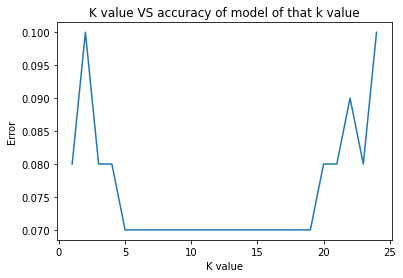

In [25]:
#Selecting k value using visiualazation technique
import matplotlib.pyplot as plt
plt.plot(list(range(1,25)),Error_list)
plt.title("K value VS accuracy of model of that k value")
plt.xlabel("K value")
plt.ylabel("Error")
plt.show()

#### Model building ####

In [26]:
model_1=KNeighborsClassifier(n_neighbors=5)
model_1.fit(x_train,y_train)
y_prediction=model_1.predict(x_test)

#### Model Evaluation ####

In [27]:
confusion_matrix(y_test,y_prediction)

array([[64,  4],
       [ 3, 29]], dtype=int64)

In [28]:
accuracy_of_model_1=accuracy_score(y_test,y_predict)
accuracy_of_model_1

0.9